Перед нами данные о ценах на авокадо в США. 

* Date — дата
* AveragePrice — средняя цена одного авокадо
* Total Volume — количество проданных авокадо
* 4046 — количество проданных авокадо сорта 4046
* 4225 — количество проданных авокадо сорта 4225
* 4770 — количество проданных авокадо сорта 4770
* Total Bags — всего упаковок
* Small Bags — маленькие упаковки
* Large Bags — большие
* XLarge Bags — очень большие
* type — обычный или органический
* year — год
* Region — город или регион 


На примере данного датасета рассмотрим динамику цен на авокадо, применив скользящее среднее (SMA - Simple Moving Average) и экспоненциальное скользящее среднее (EMA - Exponential Moving Average), рассмотрим различия этих средних на графике.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ale\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
avocado = pd.read_csv('avocado_full.csv', index_col=0)
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


Допустим нас интересует цена в Лас-Вегасе на авокадо типа organic. Посмотрим на динамику изменения этой цены в течение всего периода с помощью скользящего среднего (SMA) и экспоненциального скользящего среднего (EMA).

In [3]:
#отбремем нужный город и сорт авокадо
LasVegas_organic = avocado.query('type=="organic" and region== "LasVegas" ')

In [4]:
LasVegas_organic

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.50,6329.83,3730.80,2141.91,0.0,457.12,426.67,30.45,0.0,organic,2015,LasVegas
2015-01-11,1.54,6144.55,4027.30,2083.92,0.0,33.33,33.33,0.00,0.0,organic,2015,LasVegas
2015-01-18,1.63,6032.31,3449.94,1769.04,0.0,813.33,813.33,0.00,0.0,organic,2015,LasVegas
2015-01-25,1.66,5758.68,2421.36,3050.67,0.0,286.65,273.33,13.32,0.0,organic,2015,LasVegas
2015-02-01,1.60,7634.17,4366.54,2884.30,0.0,383.33,383.33,0.00,0.0,organic,2015,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.66,10302.50,1407.85,1898.15,0.0,6996.50,6957.59,38.91,0.0,organic,2018,LasVegas
2018-03-04,1.66,11529.02,1575.20,2190.42,0.0,7763.40,7763.40,0.00,0.0,organic,2018,LasVegas
2018-03-11,1.62,13792.54,1966.47,2132.96,0.0,9693.11,9686.91,6.20,0.0,organic,2018,LasVegas


Сначала посмотрим на скользящее среднее цен на авокадо. Скользящее среднее является арифметическим средним с заданым шагом от цен. Оно помогает определить тенденцию цены за определенный период, делая график более гладким, без излишних колебаний, которые мешают понять основной тренд цены.

Посчитаем скользящее среднее с параметрами window = 3 (от какого количетсва наблюдений будет считаться среднее), min_periods=1 (минимальное количество наблюдений, необходимое для получения среднего значения, используется для того, чтобы не было пустых значений) 

<AxesSubplot:xlabel='Date'>

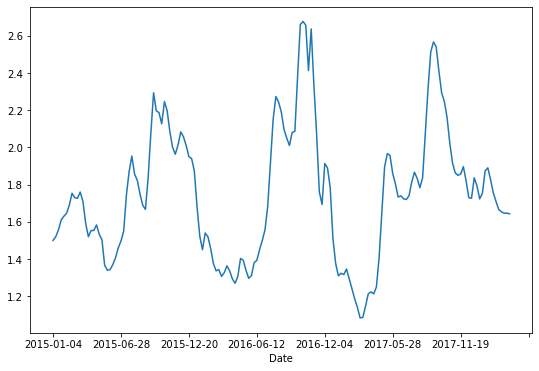

In [5]:
plt.figure(figsize=(9,6))
LasVegas_organic.AveragePrice\
.rolling(3, min_periods=1)\
.mean()\
.plot()

Посмотрим, как изменится график в зависимости от выбранного размера окна, зададим разные значениями параметра window (3, 5, 10, 50). 

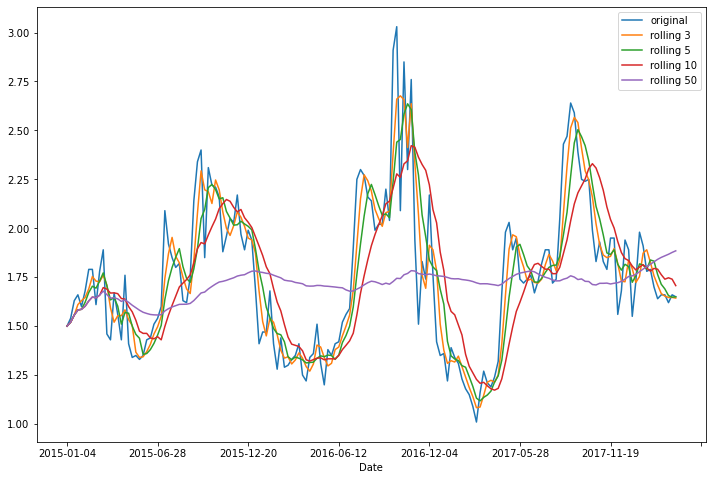

In [11]:
plt.figure(figsize=(12,8))
LasVegas_organic.AveragePrice.plot(label= 'original')
LasVegas_organic.AveragePrice.rolling(3, min_periods=1).mean().plot(label= 'rolling 3')
LasVegas_organic.AveragePrice.rolling(5, min_periods=1).mean().plot(label= 'rolling 5')
LasVegas_organic.AveragePrice.rolling(10, min_periods=1).mean().plot(label= 'rolling 10')
LasVegas_organic.AveragePrice.rolling(50, min_periods=1).mean().plot(label= 'rolling 50')
plt.legend()
plt.show()

По графику видно, что с увеличением значения параметра window, график становится более гладким. Наиболее информативной будет линия тренда с параметром window от 5 до 10.

Недостатком метода скользящей средней заключается в том, что он придает одинаковые веса как новым ценам, так и более старым ценам, хотя логичнее было бы предположить, что новые цены важнее, так как отражают более близкую к текущему моменту рыночную ситуацию. Для этого существует экспоненциальная скользящая средняя, которая придает больший вес и значимость наиболее свежим данным. 

Посчитаем экспоненциальное скользящее среднее с параметром span = 3 (от какого количетсва наблюдений будет считаться экспоненциальное скользящее среднее)

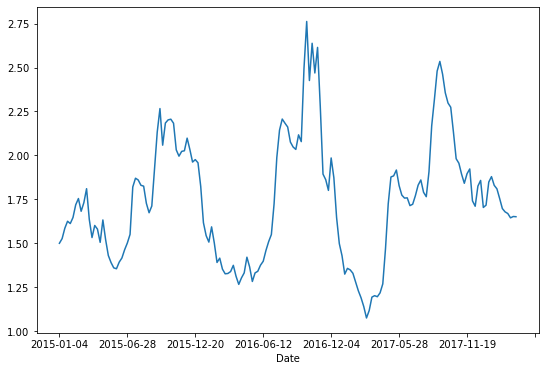

In [8]:
plt.figure(figsize=(9,6))
LasVegas_organic.AveragePrice.ewm(span=3).mean().plot()
plt.show()

Посмотрим, как изменится график в зависимости от выбранного размера диапазона, зададим разные значениями параметра span (3, 5, 10, 50).

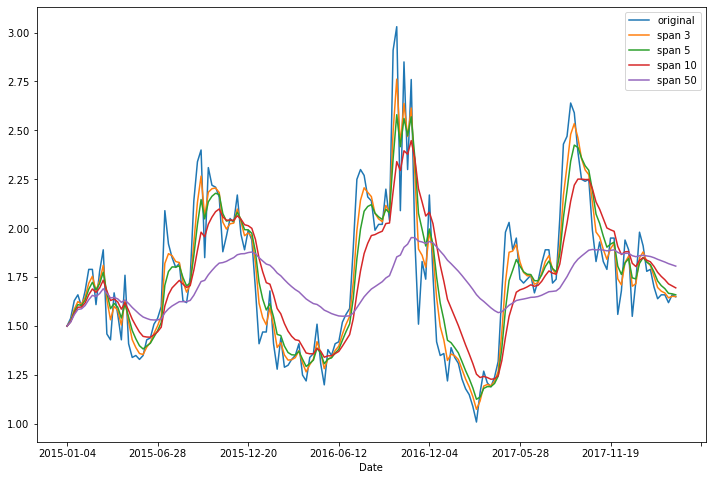

In [10]:
plt.figure(figsize=(12,8))
LasVegas_organic.AveragePrice.plot(label= 'original')
LasVegas_organic.AveragePrice.ewm(span=3).mean().plot(label= 'span 3')
LasVegas_organic.AveragePrice.ewm(span=5).mean().plot(label= 'span 5')
LasVegas_organic.AveragePrice.ewm(span=10).mean().plot(label= 'span 10')
LasVegas_organic.AveragePrice.ewm(span=50).mean().plot(label= 'span 50')
plt.legend()
plt.show()

По графику так же видно, что с увеличением значения параметра span, график становится более гладким. Наиболее информативной будет линия тренда с параметром span от 5 до 10.

Сравним графики скользящего среднего (SMA) и экспоненциального скользящего среднего (EMA), задав параметру window и span - 10  наблюдений, которые учавствуют в подсчете среднего

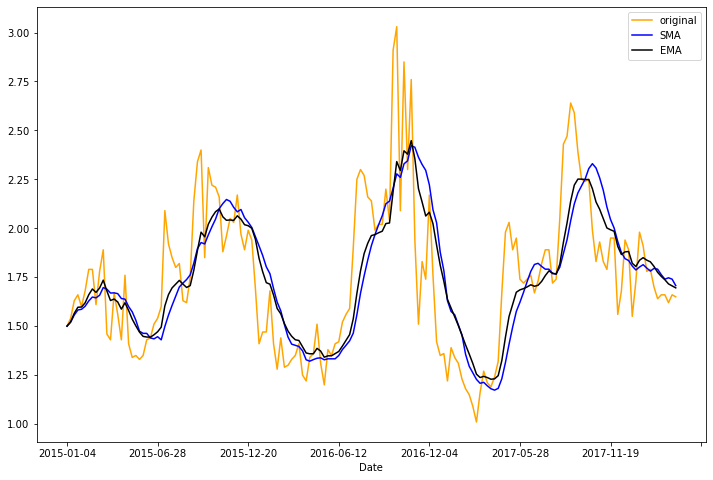

In [105]:
plt.figure(figsize=(12,8))
LasVegas_organic.AveragePrice.plot(label= 'original', color='orange')
LasVegas_organic.AveragePrice.rolling(10, min_periods=1).mean().plot(label= 'SMA', color='blue')
LasVegas_organic.AveragePrice.ewm(span=10).mean().plot(label= 'EMA', color='black')
plt.legend()
plt.show()

 По данному графику можно понять, что у экспоненциального скользящего среднего (EMA) более быстрая реакция на изменение тренда в отличие от графика скользящего среднего (SMA).